In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [68]:
def region_growing(img, seed, threshold, segmented, label):
    """
    Perform region growing segmentation.

    :param img: Input grayscale image.
    :param seed: Seed point (x, y) for region growing.
    :param threshold: Intensity difference threshold.
    :param segmented: Image to mark the segmented regions.
    :param label: Label for the current region.
    """
    seed_value = img[seed]
    to_evaluate = [seed]
    segmented[seed] = label  # Mark the seed point in the segmented image

    while to_evaluate:
        x, y = to_evaluate.pop(0)

        # Check all 8 neighbors
        for dx in [-1, 0, 1]:
            for dy in [-1, 0, 1]:
                if dx == 0 and dy == 0:
                    continue

                nx, ny = x + dx, y + dy

                # Check boundaries
                if 0 <= nx < img.shape[0] and 0 <= ny < img.shape[1]:
                    # Check if the pixel is already added to the segmented image
                    if segmented[nx, ny] == 0:
                        # Check the intensity difference
                        if abs(int(img[nx, ny]) - int(seed_value)) < threshold:
                            segmented[nx, ny] = label  # Add to segmented region
                            to_evaluate.append((nx, ny))  # Add pixel to the list to evaluate


In [74]:
def segment_all_objects(img, threshold):
    """
    Segment all objects in the input image.

    :param img: Input grayscale image.
    :param threshold: Intensity difference threshold.
    :return: Segmented image with all objects.
    """
    segmented = np.zeros_like(img, dtype=np.uint32)
    label = 1  # Start labeling from 1

    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            if segmented[x, y] == 0:  # If pixel is not yet segmented
                region_growing(img, (x, y), threshold, segmented, label)
                label += 1  # Increment label for each new region

    return segmented

In [70]:

images = []
files = ['assignment/Easy/113044.jpg', 'assignment/Easy/29030.jpg', 'assignment/Easy/299091.jpg']

for file in files:
    image = cv2.imread(file, cv2.IMREAD_GRAYSCALE)
    images.append(image)
    

In [71]:
binaries = []

for image in images:
    # Optional: Apply Gaussian blur to reduce noise
    gauss_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Optional: Apply binary thresholding to enhance regions
    _, binary_image = cv2.threshold(gauss_image, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    binaries.append(binary_image)


In [95]:
# Define the seed point and threshold
threshold_value = 10

In [96]:
# Perform segmentation
segmented = []
for binary_image in binaries:
    segmented_image = segment_all_objects(binary_image, threshold_value)
    segmented.append(segmented_image)


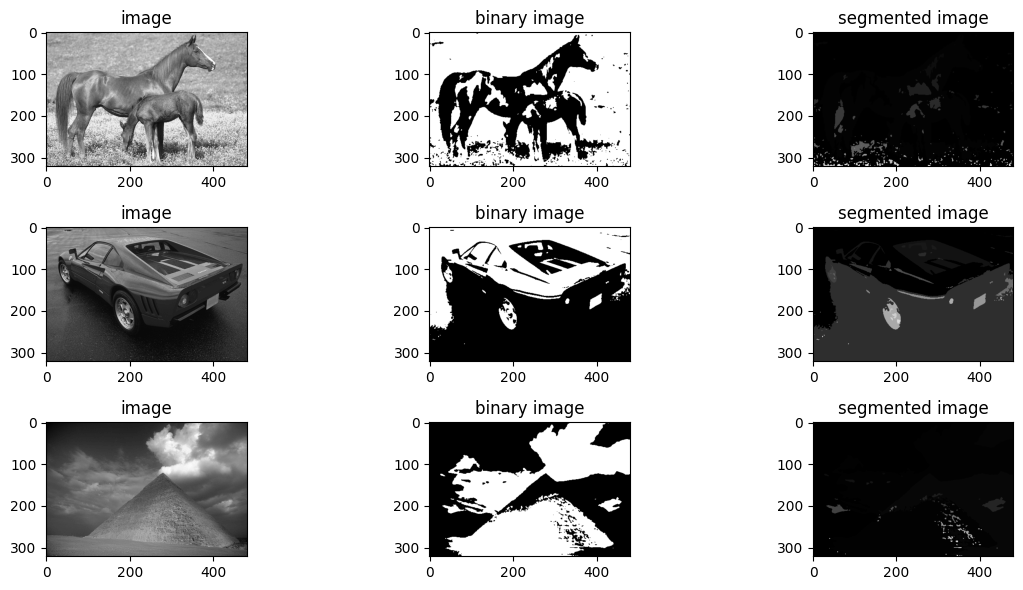

In [97]:
figure, axis = plt.subplots(nrows=3, ncols=3, figsize=(12, 6))

for idx, image in enumerate(images):
    axis[idx % 3, 0].imshow(image, cmap='gray')
    axis[idx % 3, 0].set_title('image')

    axis[idx % 3, 1].imshow(binaries[idx], cmap='gray')
    axis[idx % 3, 1].set_title('binary image')

    axis[idx % 3, 2].imshow(segmented[idx], cmap='gray')
    axis[idx % 3, 2].set_title('segmented image')

figure.tight_layout()